In [1]:
import pandas as pd
import numpy as np

In [31]:
from pathlib import Path

# `cwd`: current directory is straightforward
basepath = str(Path.cwd().parent) + '/access-to-education/map/data'

basepath

'/Users/felipe.oliveira/projects/access-to-education/map/data'

In [32]:
access_df = pd.read_csv(f'{basepath}/access_df.csv')

In [33]:
access_df.columns

Index(['Unnamed: 0', 'sector_id', '3sfca_n_classes', 'e2sfca_n_classes',
       'state', 'n_households', 'n_people', 'avg_monthly_earnings',
       'n_people_15to17_white', 'n_people_15to17_black',
       'n_people_15to17_asian', 'n_people_15to17_parda',
       'n_people_15to17_indigenous', 'n_people_15', 'n_people_16',
       'n_people_17', 'n_people_15_men', 'n_people_16_men', 'n_people_17_men',
       'n_people_15_women', 'n_people_16_women', 'n_people_17_women',
       'n_people_15to17dem', 'n_people_15to17_alternative', 'state_id',
       'state_abbrev', 'city_id', 'city_name', 'district_id', 'district_name',
       'subdistrict_id', 'subdistrict_name', 'neighborhood_name',
       'neighborhood_id', 'geometry', 'microregion_id', 'microregion_name',
       'mesoregion_id', 'mesoregion_name', 'n_people_15to17', 'A', 'Q', 'H',
       'pct_black', 'pct_white', 'pct_indigenous', 'pct_pardos', 'pct_asian',
       'pct_men', 'area', 'density', 'zone_rural', 'zone_urban',
       'region_M

In [34]:
# Percentile
# Create new columns called "A_percentile", "Q_percentile", and "H_percentile" to store the percentile values
# Percentiles should be grouped and calculated by state_id

access_df['A_percentile'] = access_df.groupby('state_id')['A'].rank(pct=True)
access_df['Q_percentile'] = access_df.groupby('state_id')['Q'].rank(pct=True)
access_df['H_percentile'] = access_df.groupby('state_id')['H'].rank(pct=True)


In [40]:
# Remove outliers in "A": observations with more than 3 standard deviations from the mean
# Create new columns called 'outliers' and 'outliers_std' to store the outliers and the standard deviation of the outliers

access_df['is_outlier'] = np.where(
    (access_df['A'] - access_df['A'].mean()) > 3 * access_df['A'].std(), 1, 0)

access_df['std_from_mean'] = (access_df['A'] - access_df['A'].mean()) / access_df['A'].std()


# Clip the outliers in columns "A" at 3 standard deviations from the mean

access_df['A'] = np.clip(access_df['A'], access_df['A'].mean() - 3 * access_df['A'].std(), 
access_df['A'].mean() + 3 * access_df['A'].std())


# Recalculate H
access_df['H'] = access_df['A'] * access_df['Q']


In [41]:
# Normalization
# Normalize the columns "A" and "H" to the range 0-1
# Create new columns called "A_normalized" and "H_normalized" to store the normalized values

# Normalization should be done by 'state', not the entire dataset

access_df['A_normalized'] = access_df.groupby('state_id')['A'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
access_df['H_normalized'] = access_df.groupby('state_id')['H'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))


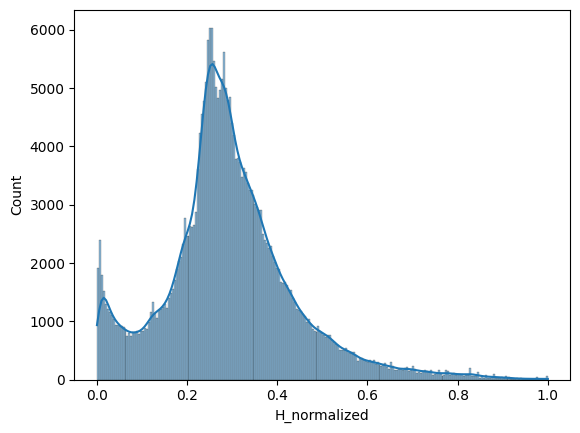

In [42]:
# Plot a histogram of the target column A to see the distribution of the data, without the outliers

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(access_df['H_normalized'], kde=True)
plt.show()

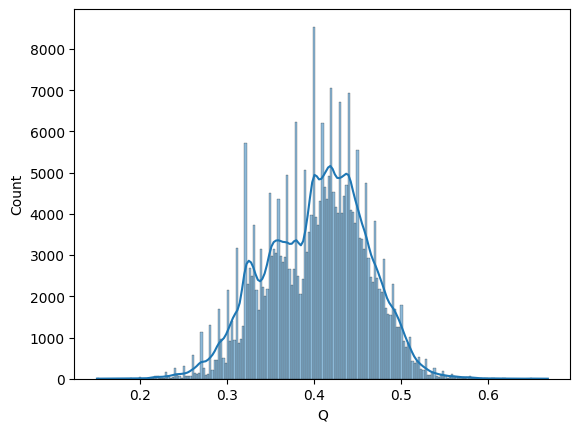

In [43]:
sns.histplot(access_df['Q'], kde=True)
plt.show()

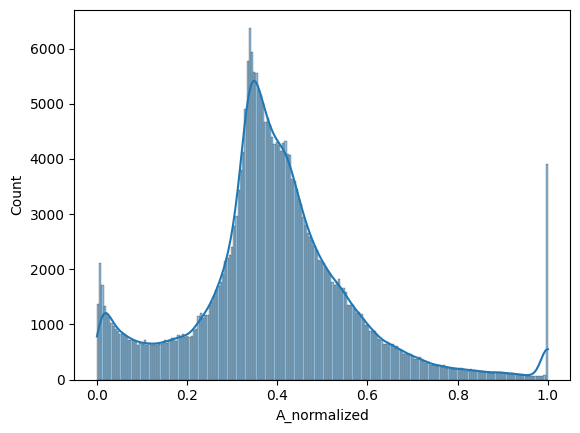

In [44]:
sns.histplot(access_df['A_normalized'], kde=True)
plt.show()

In [45]:
# Save to csv
access_df.to_csv(f'{basepath}/access_df.csv', index=False)